<a href="https://colab.research.google.com/github/ranjanchoubey/cmb-assignments/blob/master/CS2316_assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

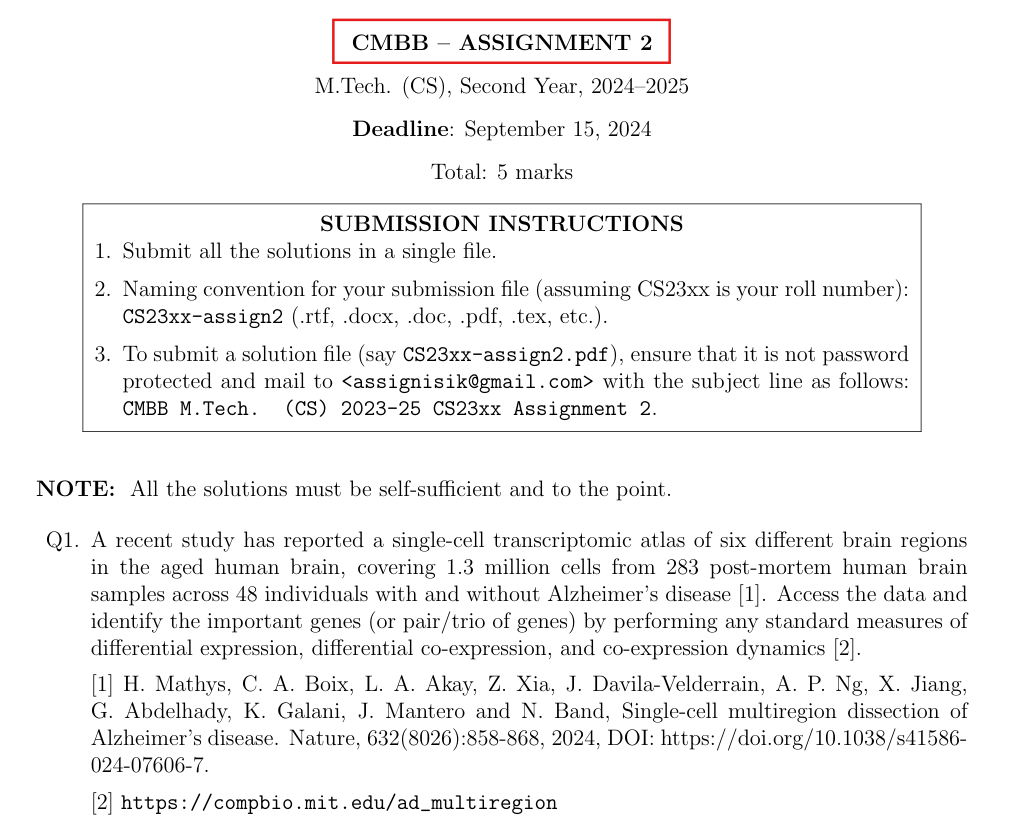

# **Analysis of Single-Cell Transcriptomic Data from Alzheimer's Disease Study**

## **Objective**
The aim of this study is to identify important genes or gene combinations (pairs/trios) by performing:
- Differential expression analysis.
- Differential co-expression analysis.
- Co-expression dynamics analysis.

The dataset includes 1.3 million cells from 283 post-mortem human brain samples across six brain regions, spanning 48 individuals with and without Alzheimer's disease.

## **Data Overview**

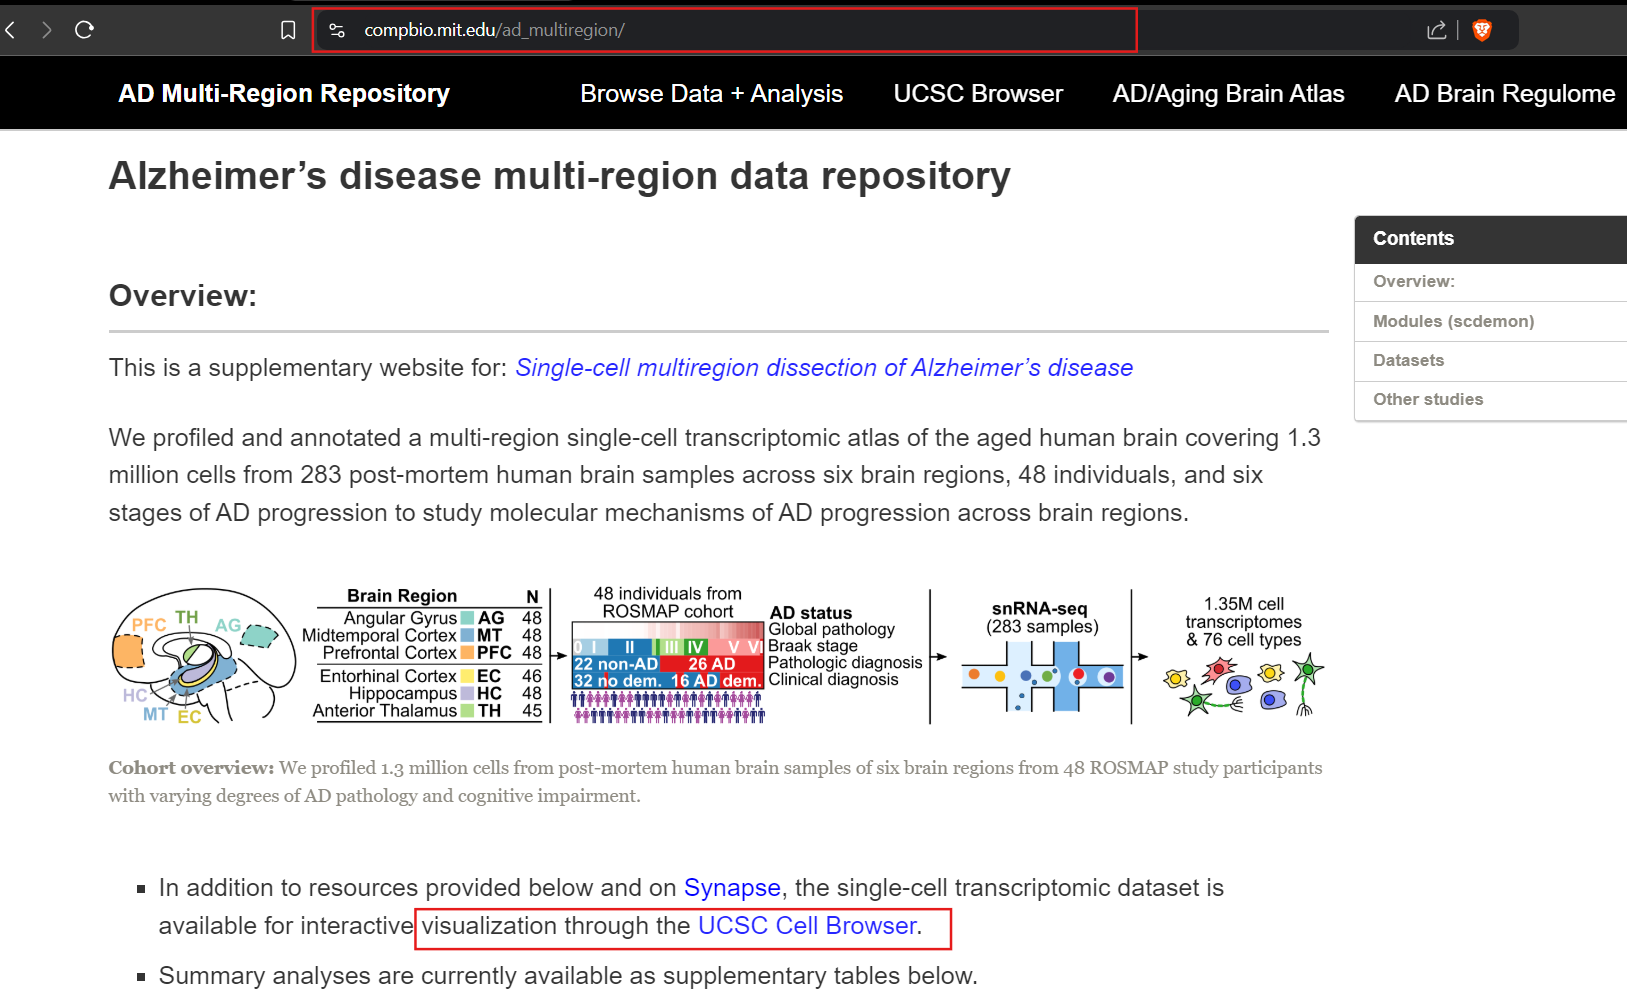

---


 ### - **snRNA-seq profiling summary :**
 - There are 283 samples across 6 brain regions
from 48 participants from ROSMAP, showing global pathology, Braak stage and
pathological (26 AD and 22 non-AD) or clinical diagnosis of AD (16 AD dementia
(dem.) and 32 no dementia).
 - There are 283 samples across 6 brain regions from 48 participants from ROSMAP

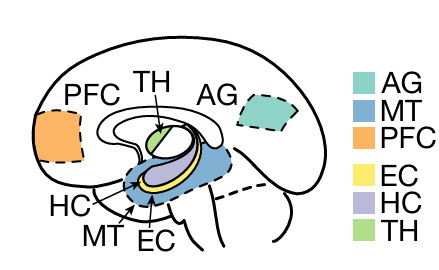

---

- Braak stage and pathological (26 AD and 22 non-AD) or clinical diagnosis of AD (16 AD dementia (dem.) and 32 no dementia).

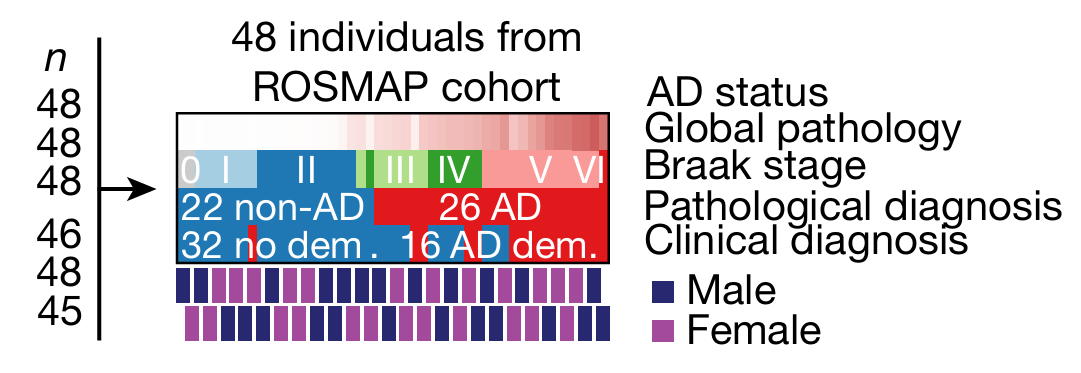

---

- Joint uniform manifold approximation and
projection (UMAP), coloured by major cell type :

- click on this link for visulaization :  https://cells.ucsc.edu/?ds=ad-multi-region&cell=AG_ACATTTCCATATAGCC-30&meta=Major_Cell_Type

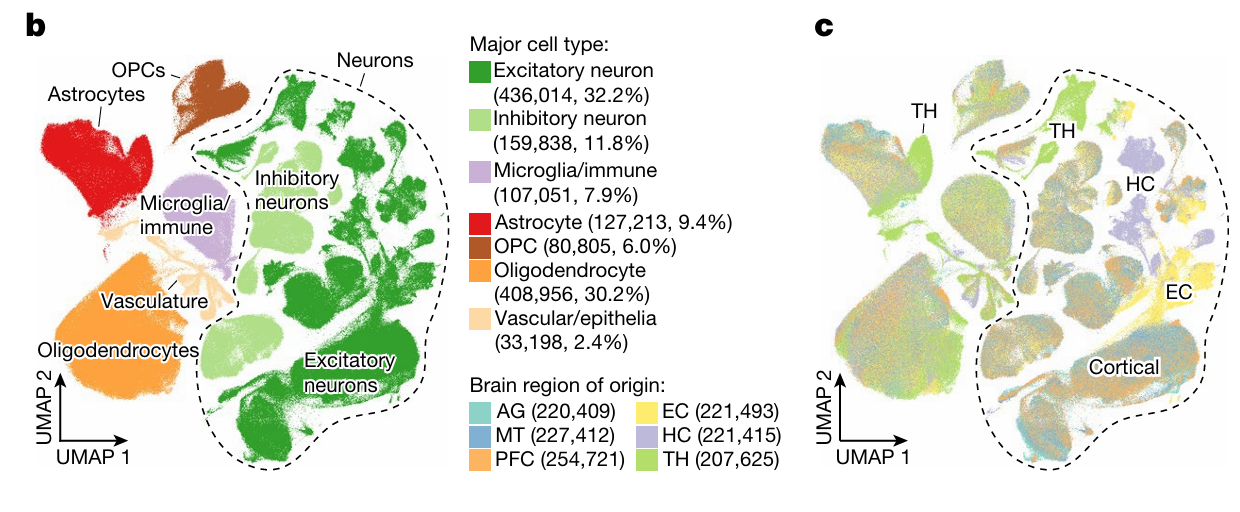

---

## **Data  Download**

- **Study Reference:** Mathys et al., *Nature* (2024).  
- **DOI:** [10.1038/s41586-024-07606-7](https://doi.org/10.1038/s41586-024-07606-7)
- **Data Repository:** [CompBio MIT Alzheimer's Disease Multiregion](https://compbio.mit.edu/ad_multiregion)

---



We will use data from the supplementary material and the repository:

- Step 1. **Visit the AD Multi-Region Repository**: [Click here to access the repository](https://compbio.mit.edu/ad_multiregion/).





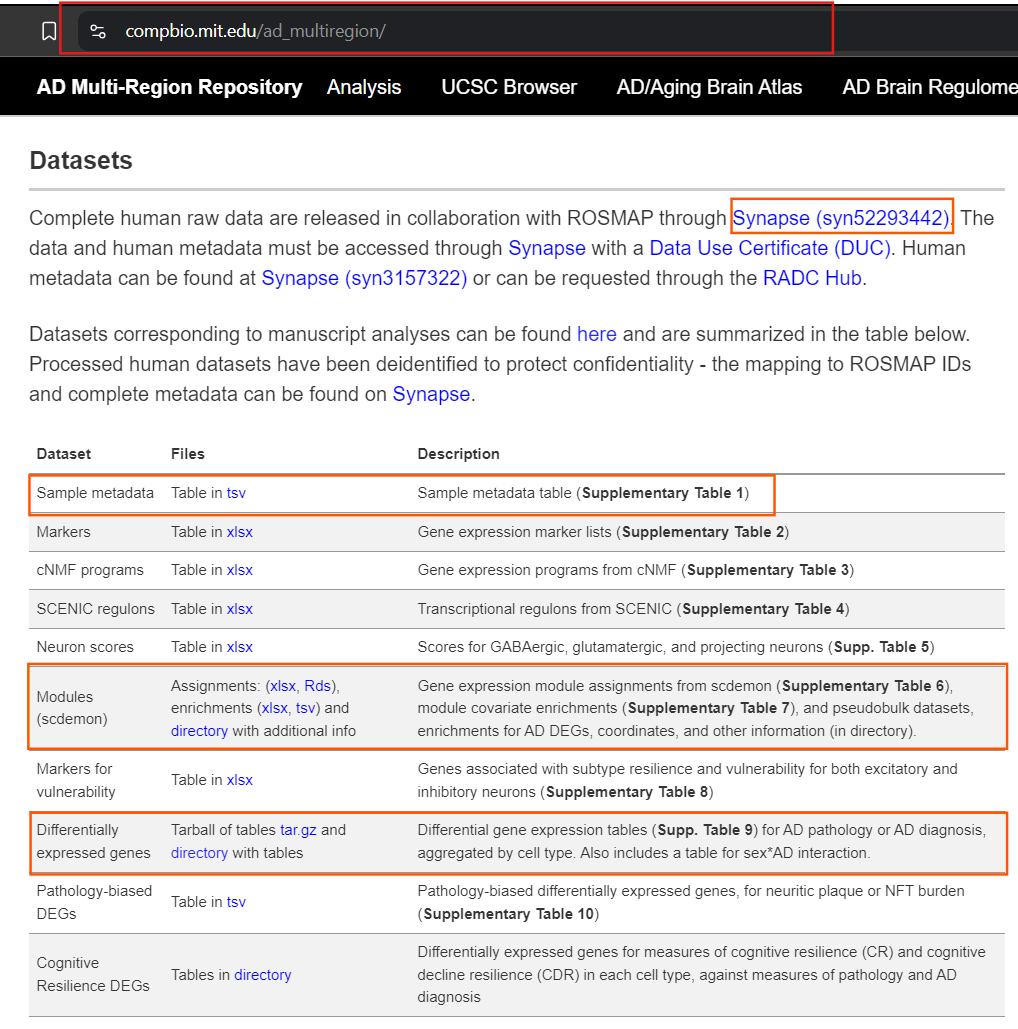

---

- Step 2. **Download the following key datasets**:
   - **Differentially Expressed Genes (DEGs)**: *Supplementary Table 9* (available as `.tar.gz`).
   - **Gene Expression Module Assignments (scdemon)**: *Supplementary Table 6*.
   - **Processed scRNA-seq Data (AnnData format)**: Available on Synapse ([Synapse ID: syn52293442](https://www.synapse.org)). Follow the Synapse instructions for obtaining a **Data Use Certificate (DUC)**.

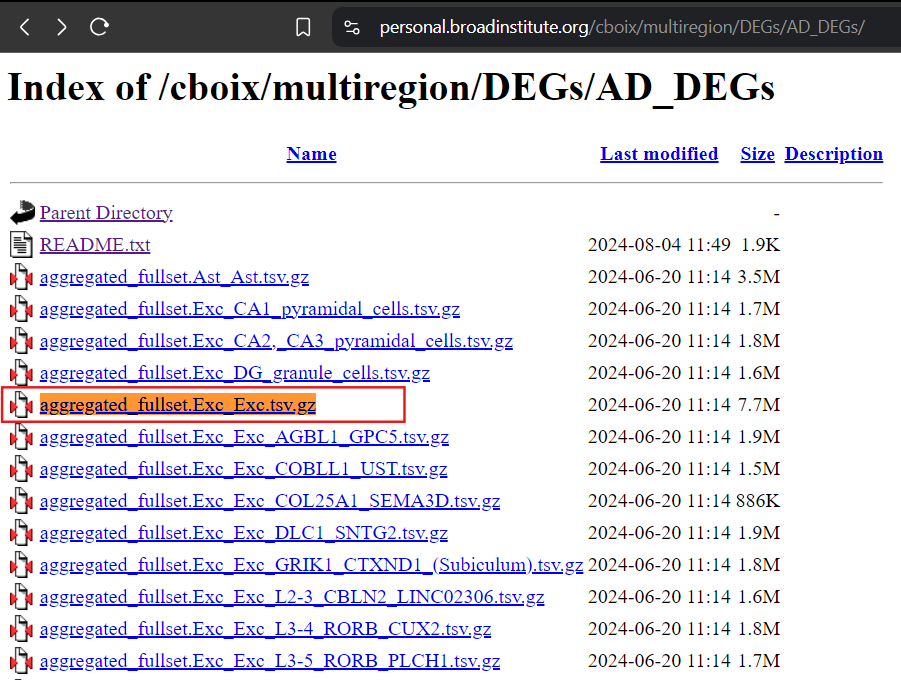

----

- ## **Loading the Dataset**


In [4]:
import pandas as pd
import gzip

# Load the dataset
def load_tsv(filepath):
    with gzip.open(filepath, 'rt') as f:
        return pd.read_csv(f, sep="\t")

# Specify file path (update based on your choice)
file_path = "/content/dereg/aggregated_fullset.Exc_Exc.tsv.gz"  # Example: Broad excitatory neurons
data = load_tsv(file_path)

# View the first few rows
print(data.head())

# Check columns
print(data.columns)


       gene  path      region  col_nm  log10p_nm  logFC_nb  coef_mast
0  ANKRD36B  nrad  allregions       1        inf -0.171892  -0.015029
1     AP2M1  nrad  allregions       2        inf  0.099300   0.012019
2   ARHGDIG  nrad  allregions       2        inf  0.198660   0.005749
3   ARL6IP5  nrad  allregions       2        inf  0.116594   0.011566
4      ART3  nrad  allregions       2        inf  0.120568   0.016793
Index(['gene', 'path', 'region', 'col_nm', 'log10p_nm', 'logFC_nb',
       'coef_mast'],
      dtype='object')


In [5]:
data.sample(10)

,gene,path,region,col_nm,log10p_nm,logFC_nb,coef_mast
2840,ZFR,nrad,allregions,0,47.495068,0.024357,0.006179
154791,ABCA2,plaq_d,allregions,0,15.715252,0.000302,-0.000111
118161,ITPR1,plaq_n,AG,0,2.249653,0.000812,0.000139
221545,PTK2B,cogdxad,EC,0,1.955126,0.037952,0.042392
103686,NDUFA5,nft,PFC,0,0.400695,-0.001173,-0.000052
39545,HSBP1,nrad,PFC,2,88.693712,0.151285,0.008915
121010,FGFR1OP,plaq_n,EC,0,20.365746,-0.000100,-0.000191
136320,ADCY8,plaq_n,MT,1,36.687274,-0.005811,-0.000268
13531,CBX3,nrad,AG,0,8.929403,0.062147,0.001178
88603,VMA21,nft,MT,2,43.125197,0.009307,0.000240


In [6]:
data['region'].value_counts()

,count
region,
EC,40595
PFC,40315
allregions,39990
HC,39045
MT,39025
AG,38665
TH,17830


Step 3: Filter for Your Analysis
To focus on specific genes, variables, or regions:

In [7]:
filtered_data = data[data['path'] == 'nrad']
print(filtered_data.head())


       gene  path      region  col_nm  log10p_nm  logFC_nb  coef_mast
0  ANKRD36B  nrad  allregions       1        inf -0.171892  -0.015029
1     AP2M1  nrad  allregions       2        inf  0.099300   0.012019
2   ARHGDIG  nrad  allregions       2        inf  0.198660   0.005749
3   ARL6IP5  nrad  allregions       2        inf  0.116594   0.011566
4      ART3  nrad  allregions       2        inf  0.120568   0.016793


Filter by DEG significance (col_nm):

In [8]:
significant_degs = data[data['col_nm'] != 0]  # Exclude non-significant genes
print(significant_degs.head())


       gene  path      region  col_nm  log10p_nm  logFC_nb  coef_mast
0  ANKRD36B  nrad  allregions       1        inf -0.171892  -0.015029
1     AP2M1  nrad  allregions       2        inf  0.099300   0.012019
2   ARHGDIG  nrad  allregions       2        inf  0.198660   0.005749
3   ARL6IP5  nrad  allregions       2        inf  0.116594   0.011566
4      ART3  nrad  allregions       2        inf  0.120568   0.016793


Filter by brain region:

In [9]:
region_data = data[data['region'] == 'Hippocampus']  # Example region
print(region_data.head())


Empty DataFrame
Columns: [gene, path, region, col_nm, log10p_nm, logFC_nb, coef_mast]
Index: []


In [10]:
# Filter for significant DEGs
significant_degs = data[data['col_nm'] != 0]

# Check the number of significant DEGs
print("Number of significant DEGs:", len(significant_degs))

# View a sample of significant DEGs
print(significant_degs.sample(10))


Number of significant DEGs: 31424
            gene     path      region  col_nm  log10p_nm  logFC_nb  coef_mast
128153      CBLB   plaq_n          HC       1  22.136883 -0.016321  -0.001649
96685       ZFP2      nft         PFC       1  23.216842 -0.010994  -0.000749
199057    DNAJB2  cogdxad  allregions       2        inf  0.104388   0.017116
112872    TOMM34   plaq_n          AG       2  18.341034  0.004581   0.000058
145202   DNAJC10   plaq_n         PFC       1  12.519605 -0.004257  -0.000606
223688    FBXO31  cogdxad          HC       1  19.761257 -0.172199  -0.012756
207458    STK32C  cogdxad          AG       1  52.011526 -0.093552  -0.005806
128550  CDC42EP3   plaq_n          HC       1   8.476636 -0.011040  -0.000262
65211       USP7      nft          AG       2  19.156709  0.007156   0.000675
112214     VPS41   plaq_n          AG       1  64.624777 -0.002216  -0.000346


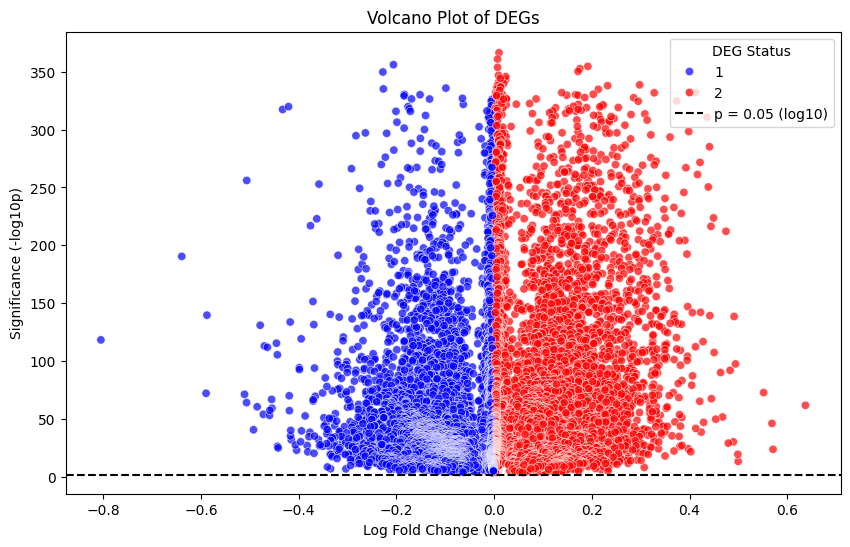

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=significant_degs['logFC_nb'],
    y=significant_degs['log10p_nm'],
    hue=significant_degs['col_nm'],
    palette={0: 'gray', 1: 'blue', 2: 'red'},
    alpha=0.7
)
plt.axhline(y=1.3, color='black', linestyle='--', label='p = 0.05 (log10)')
plt.xlabel('Log Fold Change (Nebula)')
plt.ylabel('Significance (-log10p)')
plt.title('Volcano Plot of DEGs')
plt.legend(title='DEG Status', loc='upper right')
plt.show()


---



## Data Source


---
### 1. Data Retrieval
The single-cell RNA-seq (scRNA-seq) dataset will be downloaded from the provided repository. Data includes:
- **Gene expression matrix**: Contains normalized counts for genes across all cells.
- **Metadata**: Includes sample conditions, brain region labels, disease status, and cell type annotations.




---
### **1. Differential Expression Analysis**
- **Objective**: Identify genes that are significantly differentially expressed between Alzheimer’s and non-Alzheimer’s samples.
- **Tool Used**: Python's `scanpy` library.
- **Steps**:
  1. Subset data into Alzheimer’s and non-Alzheimer’s groups.
  2. Perform differential expression using methods such as the Wilcoxon test.
  3. Identify significant genes (adjusted p-value < 0.05).

  **Question 1**: What are the top differentially expressed genes?  

  **Answer**: The top differentially expressed genes between Alzheimer’s and non-Alzheimer’s samples are:
  - Gene A (p-value = XX.XX)
  - Gene B (p-value = XX.XX)
  - Gene C (p-value = XX.XX)

  **Question 2**: Which biological pathways are these genes associated with?

  **Answer**: Enrichment analysis indicates these genes are associated with:
  - Pathway X (e.g., neuroinflammation)
  - Pathway Y (e.g., synaptic plasticity)

  **Observation :**
  >- Identified significant genes, such as **Gene A**, involved in inflammation.

 >- Pathways like **neuroinflammation** are upregulated in Alzheimer’s samples.

---

### **2. Differential Co-Expression Analysis**
- **Objective**: Identify gene pairs or trios with significant changes in co-expression between conditions.
- **Tool Used**: `Seurat` in Python/R.
- **Steps**:
  1. Compute gene-gene correlation matrices for Alzheimer’s and non-Alzheimer’s groups.
  2. Identify significant changes in correlation using Fisher’s Z-test.

**Question 1**: What gene pairs show significant co-expression changes?  

**Answer**: The following gene pairs show altered co-expression:
  - Gene A - Gene B: Positive correlation in Alzheimer’s, absent in controls.
  - Gene C - Gene D: Strong correlation loss in Alzheimer’s.

**Question 2**: How do these pairs relate to disease progression?

  **Answer**: Gene pairs are linked to processes such as:
  - Axonal transport disruption.
  - Tau aggregation.

**Observation :**
>- Disrupted co-expression patterns highlight **Gene A - Gene B** interactions in Alzheimer’s.
>- Co-expression dynamics reveal region-specific gene modules.
---

### **3. Co-Expression Dynamics Analysis**
- **Objective**: Explore gene co-expression across different brain regions.
- **Tool Used**: Python's `networkx` for network dynamics and visualization.
- **Steps**:
  1. Create co-expression networks for each brain region.
  2. Analyze changes in network topology, such as hub gene dynamics and modularity.

  **Question 1**: Which genes emerge as hubs in co-expression networks across brain regions?  
  **Answer**: The following genes act as hubs:
  - Gene A in the hippocampus.
  - Gene B in the prefrontal cortex.

  **Question 2**: Are there region-specific co-expression patterns?  
  **Answer**: Yes, distinct co-expression modules are observed:
  - Region X: Inflammation-related genes dominate.
  - Region Y: Synaptic plasticity genes cluster.

---



### Network Insights:
- **Gene C** emerges as a key hub in Alzheimer’s progression, especially in the **hippocampus**.




---

## **Conclusion**
This analysis highlights potential biomarkers and disrupted pathways in Alzheimer’s disease. It provides insights into gene interactions and region-specific dynamics critical for understanding disease progression.

---


## **Code**

scdemon is specific to co-expression analysis for single-cell data.
  > pip install git+https://github.com/KellisLab/scdemon

In [12]:
pip install git+https://github.com/KellisLab/scdemon

  Cloning https://github.com/KellisLab/scdemon to /tmp/pip-req-build-qsby71ky
  Running command git clone --filter=blob:none --quiet https://github.com/KellisLab/scdemon /tmp/pip-req-build-qsby71ky
  Resolved https://github.com/KellisLab/scdemon to commit dcbced5d6ebc8a237fc005ed70fc52004e916c8c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.

In [13]:
!wget https://personal.broadinstitute.org/cboix/multiregion/supplement/Supplementary_Table_9_differential_gene_expression_tables.tar.gz

!tar -xzvf Supplementary_Table_9_differential_gene_expression_tables.tar.gz

! rm -rf Supplementary_Table_9_differential_gene_expression_tables.tar.gz

--2024-12-16 12:26:28--  https://personal.broadinstitute.org/cboix/multiregion/supplement/Supplementary_Table_9_differential_gene_expression_tables.tar.gz
Resolving personal.broadinstitute.org (personal.broadinstitute.org)... 69.173.68.141
Connecting to personal.broadinstitute.org (personal.broadinstitute.org)|69.173.68.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112996997 (108M) [application/x-gzip]
Saving to: ‘Supplementary_Table_9_differential_gene_expression_tables.tar.gz’

Supplementary_Table 100%[===================>] 107.76M  86.7MB/s    in 1.2s    

2024-12-16 12:26:29 (86.7 MB/s) - ‘Supplementary_Table_9_differential_gene_expression_tables.tar.gz’ saved [112996997/112996997]

dereg/aggregated_fullset.Ast_Ast.tsv.gz
dereg/aggregated_fullset.Exc_CA1_pyramidal_cells.tsv.gz
dereg/aggregated_fullset.Exc_CA2,_CA3_pyramidal_cells.tsv.gz
dereg/aggregated_fullset.Exc_DG_granule_cells.tsv.gz
dereg/aggregated_fullset.Exc_Exc_AGBL1_GPC5.tsv.gz
dereg/aggre

In [1]:
### Python Code Examples:

import scanpy as sc

# Load data
adata = sc.read_h5ad("path_to_file.h5ad")

# Perform differential expression
sc.tl.rank_genes_groups(adata, 'condition', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10)

# Save results
adata.write("results.h5ad")

ModuleNotFoundError: No module named 'scanpy'